# Genetic Algorithm for Maximize a function with 2 variables

Calculate the maximum of:  
$$f(x) = 0.5 - \frac{[\sin(\sqrt{(x^2 + y^2)})]^2 - 0.5}{[1 + 0.001(x^2 + y^2)]^2}$$

Solution: $f(0,0) = 1$, where $x,y \in [-100, 100]$

### Parameters
- Representation:
  - Binary, fixed length
  - 5 decimal precision
  - Domain: $x,y \in [-100, 100]$
  - So, we need:
  -  $k_x \geq log_2{[100 - (-100)]*10^5} = log_2{2*10^7} = 24,25$ bits
  
- Population size: 100
 
- Selection: Proportional Setection
  - Rate: 0.75
  
- Genetic Operators
  - One-point crossover
  - Mutation: 0.01
  
- Termination Condition
  - Number of generations: 100

#### TODO:
- [ ] Rodar 50 experimentos
- [ ] Plotar grafico com a média da média do melhor indivíduo
- [ ] Plotar grafico com a média da média da população 
- [ ] Plotar desvio padão do resultado no gráfico
- [ ] Plotar a curva de nível da função e plotar os indivíduos em cima

---

In [1]:
import numpy as np
import random
from math import sin, pi, sqrt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
def f6(x,y):
    temp_1 = np.sin(np.sqrt(x**2 + y**2))
    temp_2 = 1 + 0.001 * (x**2 + y**2)
    return 0.5 - ((temp_1**2 - 0.5)/(temp_2**2))

In [3]:
def initialize(size):
    """ Initialize population
    
    Args:
        size: Size of the population
        
    Returns:
        Numpy matrix with the population
    """
    
    population = np.zeros((size,51))
    
    for chrom in population:
        x_value      = [int(d) for d in f'{random.randint(0, 2**25):025b}']
        y_value      = [int(d) for d in f'{random.randint(0, 2**25):025b}']
        chrom[0:25]  = x_value
        chrom[25:50] = y_value
        chrom[-1]    = fitness(chrom[:-1])

    return population    

In [4]:
def decode(binary):
    """ Convert binary to real in range (-1, 2) with 6 decimal precision
    
    Args:
        binary : Binary vector to decode
    """
    
    x_bin  = ''.join(str(int(d)) for d in binary)
    x_int  = int(x_bin, 2)
    x_real = np.array(-100 + (x_int * (200/(2**25 - 1)))).round(decimals=5)
    
    return(x_real)

In [5]:
def fitness(chromosome):
    """ Calculate fitness
    
    Args:
        chromosome: Chromosome to calculate fitness
        
    Returns:
        Calculated fitness
    """
    
    x      = decode(chromosome[0:25])
    y      = decode(chromosome[25:50])
    fitness = f6(x,y)

    return fitness

In [6]:
def selection(population, tx):
    """ Select chromosomes to reproduce using proportional selection algorithm
    
    Args:
        population : Matrix with all population
        tx         : Selection rate
        
    Return:
        Parents selected to reproduce
    """
    
    size = round(len(population) * tx)
    
    if (size % 2 != 0 or size == 0): 
        size += 1
    
    pop = population.copy()
    pop = pop[pop[:,-1].argsort()][:-1]   # Sorte in increasing order
    
    parents      = np.zeros((size, pop.shape[1]))
    total_fitness = sum(c[-1] for c in population)
    
    for i in range(0, size):
        pick    = random.uniform(0, total_fitness)
        current = 0
        
        for chrom in population:
            current += chrom[-1]
            if current > pick:
                parents[i] = chrom
                break

    return parents

In [7]:
def crossover(parents):
    """ Create children using single-point crossover
    
    Args:
        parents: Matrix with selected parents
        
    Returns:
        Vector with generated children
    """
    
    children = parents.copy()
    
    for i in range(0, len(children), 2):
        point = int(np.array(random.sample(range(1, parents.shape[1] - 1), 1)))

        # Children 1
        children[i, :point]   = parents[i+1, :point]
        children[i,-1]         = fitness(children[i,:-1])
        
        # Children 2
        children[i+1, :point] = parents[i, :point]
        children[i+1, -1]      = fitness(children[i+1, :-1])
        
    return children

In [8]:
def mutation(population, tx):
    """ Apply mutation
    
    Args:
        population : Matrix with all population
        tx         : Mutation rate
    """
    
    n_mutation = round(len(population)*tx)
    
    if (n_mutation < 0): 
        n_mutation = 1
        
    for i in range(0, n_mutation):
        chromosome = random.randint(2, population.shape[0] - 1)
        locus      = random.randint(0, population.shape[1] - 2)
        
        population[chromosome, locus] = random.randint(0,1)
        population[chromosome, -1]    = fitness(population[chromosome, :-1])
        

In [9]:
gen = 150
pop = initialize(100)

better = np.zeros(gen)
mean   = np.zeros(gen)

for i in range(0, gen):
    pop          = pop[pop[:,-1].argsort()][::-1] # Sorte in decreasing order
    parents      = selection(pop, 0.75)           # Population, tx
    children     = crossover(parents)
    n_keep       = len(pop) - len(children)
    pop[n_keep:] = children
    mutation(pop, 0.1)
    
    better[i]    = pop[0, -1]
    mean[i]      = np.mean(pop[:,-1])

In [10]:
x = decode(pop[1,0:25])
y = decode(pop[1,25:50])
z = pop[1,-1]

print(f'Best: x:{x:.2f}, y:{y:.2f}, f(x,y):{z:.2f}')

Best: x:3.58, y:5.15, f(x,y):0.96


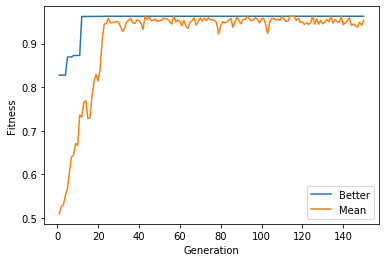

In [11]:
plt.figure()
plt.plot(np.arange(1,gen+1), better, label = 'Better')
plt.plot(np.arange(1,gen+1), mean, label = 'Mean')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()

In [ ]:
x_axis = np.arange(-10,10,0.1)
y_axis = np.arange(-10,10,0.1)

X,Y = np.meshgrid(x_axis,y_axis)           
Z   = f6(X, Y)

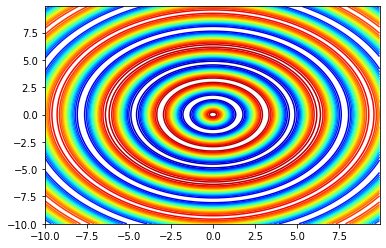

In [36]:
plt.figure()
plt.contour(X, Y, Z, 20, cmap=cm.jet)
plt.show()

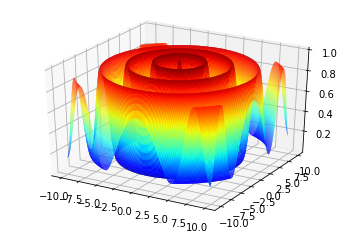

In [20]:
fig  = plt.figure()
ax  = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
plt.show()